## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

In [46]:
import importlib
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from roadlanes import draw_lane
import roadlanes
import searchlines
import perspectivetransform

In [47]:
importlib.reload(adv_lane_lines)
importlib.reload(roadlanes)
importlib.reload(searchlines)
importlib.reload(perspectivetransform)

<module 'perspectivetransform' from 'C:\\Users\\rafal\\Documents\\GitHub\\Udacity-CarND\\CarND-Advanced-Lane-Lines-master\\perspectivetransform.py'>

In [48]:
# calibrating camera based on images from camera_cal
calibration = adv_lane_lines.camera_calibration("camera_cal")

In [49]:
# undistor camera images, store artifacts
adv_lane_lines.distortion_correction(calibration, "camera_cal", "output_images")

In [50]:
# discovering lines
# applying Sobel gradient and using HLS color transformation
# stacking two methods over each other
adv_lane_lines.thresholds_pipeline("test_images", "output_images", s_thresh=(20, 100), sx_thresh=(20, 255))

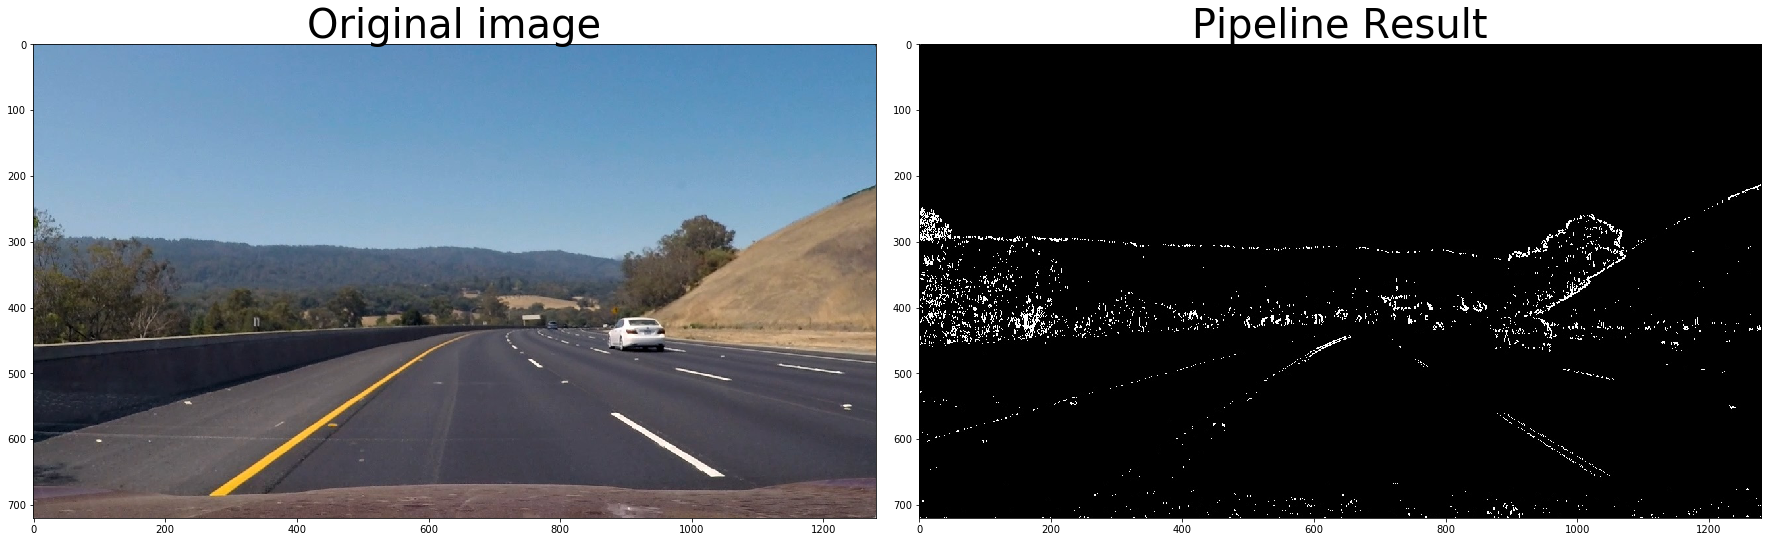

In [51]:
img = cv2.imread("test_images\\test3.jpg")
result = cv2.imread("output_images\\lines_test3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
figure.tight_layout()
ax1.imshow(img)
ax1.set_title('Original image', fontsize=40)
ax2.imshow(result, cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [52]:
# changing perspective of images
file_to_transform = "output_images\\lines_test1.jpg"
warped_img, unwarped_img, m, minv = perspectivetransform.perspective_transform(file_to_transform)

In [53]:
line_img = cv2.imread("output_images\\lines_test3.jpg")
warped_img = cv2.imread("output_images\\warped_lines_test3.jpg")
#cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)

Image shape: 720, 1280


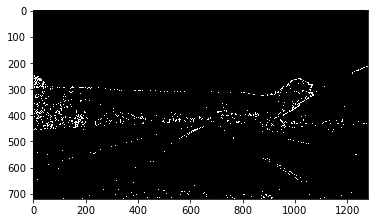

In [54]:
# binary tranformed image
print("Image shape: {}, {}".format(line_img.shape[0], line_img.shape[1]))
plt.imshow(line_img)  
plt.show()

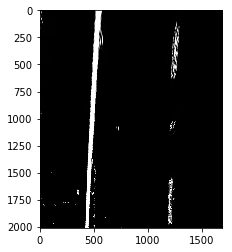

In [55]:
# image after perspetive transformation
plt.imshow(warped_img)
plt.show()


1795.5309147985308 1888.9310957287591
589.5344111336246 m 620.0132605808573 m


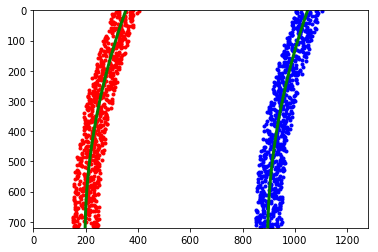

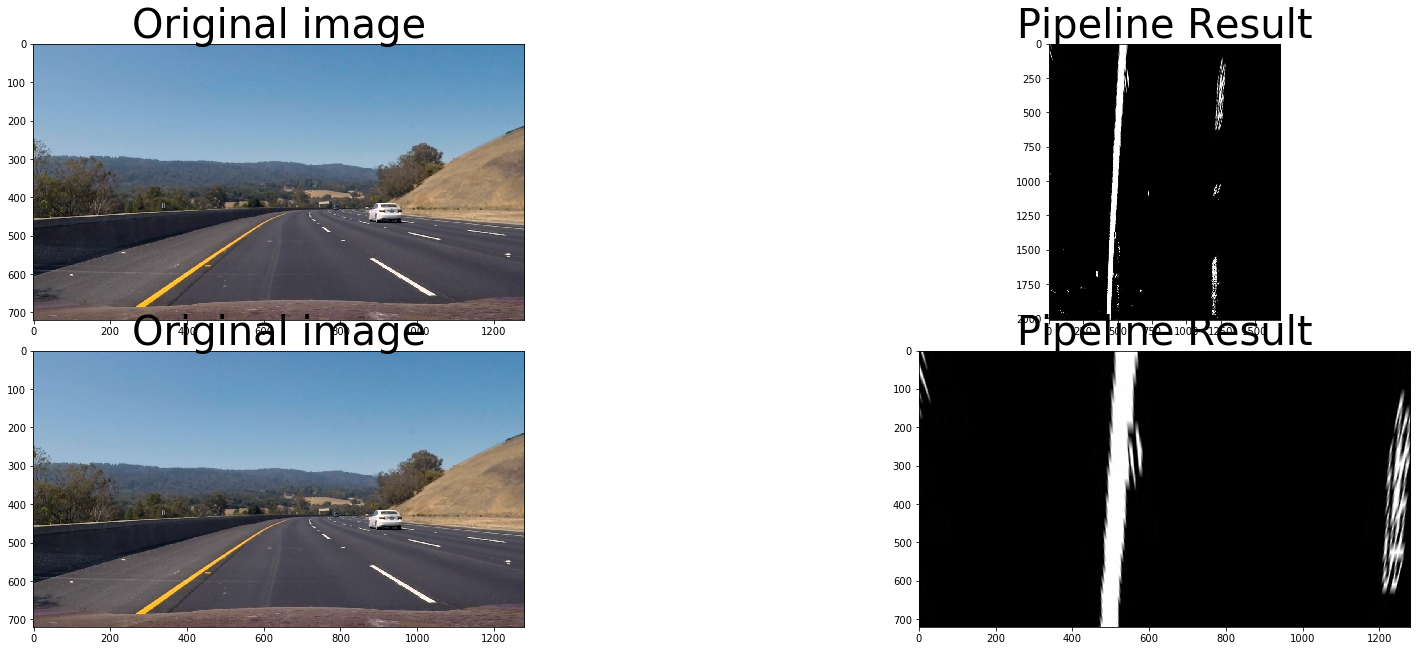

In [56]:
roadlanes.main()